# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision
---
#### <a href="https://taldatech.github.io/">Tal Daniel</a> 

## Tutorial 1.5 - Deep Learning - PyTorch Basics
---

<img src="./assets/tut_xiv_pytorch_logo.png" style="height:100px" />

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Introduction & Motivation](#-Introduction-&-Motivation)
* [Up & Running with PyTorch](#-PyTorch-Basics)
    * [PyTorch Basics](#-PyTorch-Basics)
    * [Datasets: MNIST, Fashion-MNIST](#-Datasets-in-PyTorch---MNIST-&-Fashion-MNIST)
    * [Multi-Layer Perceptrons (MLPs)](#-Multi-Layer-Perceptron-(MLP)-in-PyTorch)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, ConcatDataset
import torchvision

## <img src="https://img.icons8.com/color/48/000000/fire-element.png" style="height:50px;display:inline" /> Introduction & Motivation
---
As you saw in the ML course, even though the idea of a neural network is a simple one, the implementation and calculations are not very sympathetic. Neural networks are a strong tool that might be useful to many sorts of tasks and thus simple frameworks were established to help engineers focus on the task rather than the actual implemntation of the neural networks and making the backpropagation easy as one line of code. There are several deep learning frameworks, where the two most popular ones are <a href="https://tensorflow.org">Tensorflow</a> (maintained by Google) and <a href="https://pytorch.org">PyTorch</a> (maintained by Facebook). TF and PyTorch have different workflows, though in recent versions they share some of the workflows.

<img src="./assets/tut_xiv_pytorch_logo.png" style="height:100px" />
PyTorch is "an open source deep learning platform that provides a seamless path from research prototyping to production deployment". In simple words, PyTorch is meant to make deep learning programming more easier for Python programmers by adapting the Python workflow and "easy-to-code" language.  Also, the PyTorch official website provides great tutorials to get you up and running in most deep learning fields (Computer Vision, Reinforcement Learning, Natural Language Processing).

At its core, PyTorch provides two main features:

* An n-dimensional Tensor, similar to numpy but can run on GPUs
* Automatic differentiation for building and training neural networks

The word "Tensor" might seem initmidating, but it is just an n-dimensional array or matrix.  A PyTorch Tensor is conceptually identical to a `numpy` array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing. Most of the function and methods available in `numpy` are also available in PyTorch for tensors. 

#### Why not just use NumPy?
---
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

### <img src="https://img.icons8.com/dusk/64/000000/diversity.png" style="height:50px;display:inline"> PyTorch Basics
---
We will now introduce some the basics. The main thing to keep in mind is that PyTorch was designed to have similar API as NumPy's. That means that almost every NumPy's function is in PyTorch, and most probably has the same name and same parameters.

In [3]:
# create a tensor initialized from a random uniform distribution
x = torch.Tensor(5, 3).uniform_(-1, 1)
print("x: \n", x)
print("x size:", x.size())
print("same as x shape:", x.shape)
print()

x: 
 tensor([[-0.9316, -0.2761,  0.7423],
        [-0.7188, -0.6464, -0.8161],
        [ 0.2640,  0.6787, -0.3176],
        [ 0.3718, -0.8876, -0.8888],
        [-0.1430, -0.6374, -0.8229]])
x size: torch.Size([5, 3])
same as x shape: torch.Size([5, 3])



In [4]:
# basic math oprations
y = torch.rand(5, 3)
print("y: \n", y)
print("x + y = \n", x + y)
print("x - y = \n", x - y)
print()

y: 
 tensor([[0.5636, 0.0164, 0.2488],
        [0.4739, 0.0954, 0.7210],
        [0.1011, 0.9942, 0.8188],
        [0.7817, 0.6225, 0.3460],
        [0.9175, 0.1450, 0.6944]])
x + y = 
 tensor([[-0.3680, -0.2596,  0.9911],
        [-0.2449, -0.5510, -0.0952],
        [ 0.3651,  1.6729,  0.5012],
        [ 1.1534, -0.2652, -0.5428],
        [ 0.7745, -0.4924, -0.1285]])
x - y = 
 tensor([[-1.4953, -0.2925,  0.4935],
        [-1.1927, -0.7417, -1.5371],
        [ 0.1630, -0.3155, -1.1363],
        [-0.4099, -1.5101, -1.2348],
        [-1.0605, -0.7825, -1.5172]])



In [5]:
# indexing - same as NumPy
print("x[3, :] = ", x[3, :])
print()

x[3, :] =  tensor([ 0.3718, -0.8876, -0.8888])



In [5]:
# ones, zeros, reshaping - same as NumPy
print("torch.ones([2, 2]): \n", torch.ones([2,2]))
print("torch.zeros([1, 2]): \n", torch.zeros([1,2]))
print("y.reshape(-1, 1): \n", y.reshape(-1, 1)) 
# -1 just means 'don't care about the dimension this axis, make it happen'
# more efficiently, use `view` as it doesn't copy the variable (saves memory)
print("y.view(-1, 1): \n", y.view(-1, 1))
print()

torch.ones([2, 2]): 
 tensor([[1., 1.],
        [1., 1.]])
torch.zeros([1, 2]): 
 tensor([[0., 0.]])
y.reshape(-1, 1): 
 tensor([[0.0746],
        [0.9194],
        [0.7642],
        [0.7937],
        [0.5881],
        [0.2956],
        [0.6239],
        [0.1899],
        [0.8838],
        [0.4624],
        [0.2099],
        [0.3366],
        [0.2956],
        [0.7547],
        [0.9789]])
y.view(-1, 1): 
 tensor([[0.0746],
        [0.9194],
        [0.7642],
        [0.7937],
        [0.5881],
        [0.2956],
        [0.6239],
        [0.1899],
        [0.8838],
        [0.4624],
        [0.2099],
        [0.3366],
        [0.2956],
        [0.7547],
        [0.9789]])



In [6]:
# torch <-> numpy
z = torch.tensor(np.array([[1, 2], [3, 4]]))
print("z: \n", z)
print()

z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



In [7]:
# torch <-> numpy, alternative version
a = np.array([[1, 2], [3, 4]])
z = torch.from_numpy(a)
print("z: \n", z)
print()

z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



In [6]:
p = x.numpy()
print("p = x.numpy(): \n", p)
print()

p = x.numpy(): 
 [[-0.93162763 -0.27608442  0.7423003 ]
 [-0.71882963 -0.6463584  -0.8161427 ]
 [ 0.26402986  0.678723   -0.31756258]
 [ 0.3717742  -0.8876412  -0.88880277]
 [-0.14297056 -0.6374365  -0.8228916 ]]



In [7]:
# tensor multiplication
xy = x @ y.t()
print("xy = x @ y.t(): \n", xy)
# or
xy = torch.matmul(x, y.t())
print("xy = torch.matmul(x, y.t()): \n", xy)
print()

xy = x @ y.t(): 
 tensor([[-0.3449,  0.0674,  0.2391, -0.6432, -0.3794],
        [-0.6189, -0.9907, -1.3835, -1.2466, -1.3199],
        [ 0.0810, -0.0391,  0.4415,  0.5190,  0.1202],
        [-0.0262, -0.5493, -1.5727, -0.5695, -0.4048],
        [-0.2958, -0.7218, -1.3220, -0.7933, -0.7950]])
xy = torch.matmul(x, y.t()): 
 tensor([[-0.3449,  0.0674,  0.2391, -0.6432, -0.3794],
        [-0.6189, -0.9907, -1.3835, -1.2466, -1.3199],
        [ 0.0810, -0.0391,  0.4415,  0.5190,  0.1202],
        [-0.0262, -0.5493, -1.5727, -0.5695, -0.4048],
        [-0.2958, -0.7218, -1.3220, -0.7933, -0.7950]])



In [8]:
# element-wise
xy = x * y
print("xy = x * y: \n", xy)
# or
xy = torch.mul(x, y)
print("xy = torch.mul(x, y): \n", xy)

xy = x * y: 
 tensor([[-0.5251, -0.0045,  0.1847],
        [-0.3406, -0.0616, -0.5884],
        [ 0.0267,  0.6748, -0.2600],
        [ 0.2906, -0.5525, -0.3075],
        [-0.1312, -0.0924, -0.5714]])
xy = torch.mul(x, y): 
 tensor([[-0.5251, -0.0045,  0.1847],
        [-0.3406, -0.0616, -0.5884],
        [ 0.0267,  0.6748, -0.2600],
        [ 0.2906, -0.5525, -0.3075],
        [-0.1312, -0.0924, -0.5714]])


### <img src="https://img.icons8.com/dusk/64/000000/processor.png" style="height:50px;display:inline"> Device - CPU or GPU?
---
* The greatest advantage of using the deep learning frameworks in the ability to utilize the GPUs. In PyTorch, we can code it to automatically choose which device to use.
* A good practice is to always define the device at the beginning of your code, and then just send the models and tensors to that devie using `.to(device)`

In [2]:
# check if there is a GPU available
print(torch.cuda.is_available())
# check what is the current available device
if torch.cuda.is_available():
    print("current device: ", torch.cuda.current_device())
# automatically choose device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # use gpu 0 if it is available, o.w. use the cpu
print("device: ", device)

# create a random tensor and send it to the device
a = torch.randn([2, 2]).to(device)
print(a)

True
current device:  0
device:  cuda:0
tensor([[-0.5621,  0.3617],
        [ 1.7573,  0.0395]], device='cuda:0')


### <img src="https://img.icons8.com/cute-clipart/64/000000/documents-folder.png" style="height:50px;display:inline"> Datasets in PyTorch - MNIST & Fashion-MNIST
---
* The first thing we need to do before we build our networks is load the data, separate it to train and test sets (and sometimes also validation) and create batches of it to train using one of the Gradient Descent optimizers.
* Fortunately, PyTorch provide a simple data structure to load the data (usually from files) called `Dataset` and another data structure, called `DataLoader` that creates batches out of the Dataset (and it even takes care of shuffling it if you wish).
* We now introduce two very popular datasets:

1. **MNIST**- The MNIST database (1998) of handwritten digits (0-9, a total of 10 digits) has a training set of 60,000 examples, and a test set of 10,000 examples. Images are of size 28 x 28 pixels with one color channel. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. MNIST is broadly used as a baseline to many ML papers, even today.
2. **Fashion-MNIST** - Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Let's load the dataset (PyTorch provides an auto-download feature).

shape: 
 torch.Size([128, 1, 28, 28])


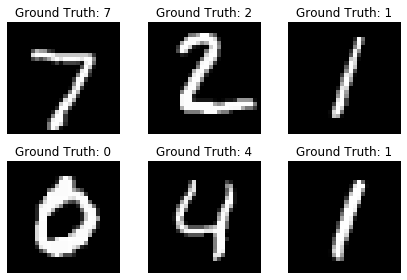

In [4]:
batch_size = 128
# MNIST
mnist_train_dataset = torchvision.datasets.MNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

mnist_test_dataset = torchvision.datasets.MNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

# We use drop_last=True to avoid the case where the data / batch_size != int

mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# let's plot some of the samples from the test set
examples = enumerate(mnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("shape: \n", example_data.shape)
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(example_data[i][0], cmap='gray', interpolation='none')
    ax.set_title("Ground Truth: {}".format(example_targets[i]))
    ax.set_axis_off()
plt.tight_layout()

shape: 
 torch.Size([128, 1, 28, 28])


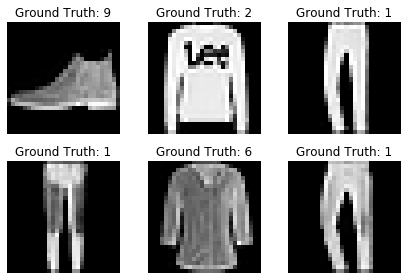

In [5]:
# Fashion-MNIST
fmnist_train_dataset = torchvision.datasets.FashionMNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

fmnist_test_dataset = torchvision.datasets.FashionMNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
fmnist_train_loader = torch.utils.data.DataLoader(dataset=fmnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

fmnist_test_loader = torch.utils.data.DataLoader(dataset=fmnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# let's plot some of the samples from the test set
examples = enumerate(fmnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("shape: \n", example_data.shape)
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(example_data[i][0], cmap='gray', interpolation='none')
    ax.set_title("Ground Truth: {}".format(example_targets[i]))
    ax.set_axis_off()
plt.tight_layout()

### <img src="https://img.icons8.com/color/96/000000/broadcasting.png" style="height:50px;display:inline"> Multi-Layer Perceptron (MLP) in PyTorch
---
* Other names: Fully-Connected (FC) Network (FCN), Dense Network

An MLP is composed of one input layer, one or more hidden layers and a final output layer. Every layer, except the output layer includes a bias neuron which is fully connected to the next layer. When the number of hidden layers is larger than 2, the network is usually called a deep neural network (DNN).

The algorithm is composed of two main parts: forward pass and backward pass. In the forward pass, for each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer (using the network for prediction is just doing a forward pass). Then, the output error (the difference between the desired output and the actual output from the network) is computed.

After the output error calculation, the network calculates how much each neuron in the last hidden layer contributed to the output error (using the chain rule). It then proceeds to measure how much of these error contributions came from each neuron in the previous layers until reaching the input layer. This is the backward pass: measuring the error gradient across all the connection weights in the network by propagating the error gradient backward in the network (this is the backpropagation process).

In short: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes in reverse to measure the error contribution from each connection (backward pass) and finally, using Gradient Descent, updates the weights in the direction that reduces the error.

<img src="./assets/tut_xiv_mlp.jpg" style="height:200px">

#### Implementing an MLP
---
We will now see how easy it is to implement a neural network using PyTorch. The first thing to know is that every neural network (NN) is inherited from parent class `torch.nn.Module`, which establishes a shared workflow, that is, every (!) NN in PyTorch has the same properties in terms of functunality. This global design helps with building a common language. We will now meet PyTorch's basic blocks and see why it is so popular. 

We will implement the following network:
* Input dimension: 28 * 28
* Output dimension: 10 (as the number of classes)
* Batch size: 128
* Hidden Layers: 1
* Hidden Units: 256
* Optimizer: Adam (Learning Rate: 0.001)
* Activation: ReLU

In [6]:
# define a two-layer MLP
# method 1
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        Parameters:
            D_in - dimensions of inputs
            H - number of hidden units per layer
            D_out - dimensions of outputs
        """
        # initialzing the parent object (important!)
        super(TwoLayerNet, self).__init__()
        # define the first layer (hidden)
        self.linear1 = torch.nn.Linear(D_in, H)
        # define the second layer (output)
        self.linear2 = torch.nn.Linear(H, D_out)
        # define the activation function
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        Parameters:
            x - tensor of inputs (shape: [BATCH_SIZE, D_in])
        """
        h_relu = self.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred
    
# method 2
class TwoLayerNetPiped(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        Parameters:
            D_in - dimensions of inputs
            H - number of hidden units per layer
            D_out - dimensions of outputs
        """
        # initialzing the parent object (important!)
        super(TwoLayerNetPiped, self).__init__()
        # Create a pipeline - a sequence of layers
        self.pipe = torch.nn.Sequential(
            torch.nn.Linear(D_in, H), 
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        Parameters:
            x - tensor of inputs (shape: [BATCH_SIZE, D_in])
        """
        return self.pipe(x)

### When to use method 1 and when to use method 2?
---
If you want easy access to the weights of the layers (to do some manipulating on them or create your algorithm) then it is better to use method 1, otherwise, use method 2.

In [7]:
# hyper-parameters:
num_epochs = 10
learning_rate = 0.001

# Device configuration, as before
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# create model, send it to device
model = TwoLayerNetPiped(D_in=28*28, H=256, D_out=10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# Train the model
model.train()  # training mode
total_step = len(mnist_train_loader)
start_time = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train_loader):
        # each i is a batch of 128 samples
        images = images.to(device).view(batch_size, -1)  # represent images as column vectors
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize - ALWAYS IN THIS ORDER!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Time: {:.4f} secs' 
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), time.time() - start_time))

Epoch [1/10], Step [100/468], Loss: 0.4783, Time: 1.8672 secs
Epoch [1/10], Step [200/468], Loss: 0.1721, Time: 3.2621 secs
Epoch [1/10], Step [300/468], Loss: 0.1589, Time: 4.5964 secs
Epoch [1/10], Step [400/468], Loss: 0.1732, Time: 5.9777 secs
Epoch [2/10], Step [100/468], Loss: 0.2179, Time: 8.2756 secs
Epoch [2/10], Step [200/468], Loss: 0.2117, Time: 9.6090 secs
Epoch [2/10], Step [300/468], Loss: 0.1143, Time: 10.9415 secs
Epoch [2/10], Step [400/468], Loss: 0.1430, Time: 12.2827 secs
Epoch [3/10], Step [100/468], Loss: 0.1151, Time: 14.6643 secs
Epoch [3/10], Step [200/468], Loss: 0.0915, Time: 16.0267 secs
Epoch [3/10], Step [300/468], Loss: 0.2148, Time: 17.3831 secs
Epoch [3/10], Step [400/468], Loss: 0.1106, Time: 18.6888 secs
Epoch [4/10], Step [100/468], Loss: 0.0481, Time: 20.8634 secs
Epoch [4/10], Step [200/468], Loss: 0.0289, Time: 22.1266 secs
Epoch [4/10], Step [300/468], Loss: 0.0971, Time: 23.4104 secs
Epoch [4/10], Step [400/468], Loss: 0.0954, Time: 24.7019 sec

In [9]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance), or use:
with torch.no_grad(): # "don't keep track of the gradients" ,can also use .detach()
    correct = 0
    total = 0
    for images, labels in mnist_test_loader:
        images = images.to(device).view(images.size(0), -1)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.78 %


### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* PyTorch - <a href="https://www.youtube.com/watch?v=_H3aw6wkCv0&t=2s">Stefan Otte: Deep Neural Networks with PyTorch | PyData Berlin 2018</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* EE 046746 Spring 21 - <a href="https://taldatech.github.io/">Tal Daniel</a> 
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com